In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
warnings.filterwarnings('ignore')

## Wczytanie ramki danych

In [47]:
df = pd.read_csv("australia.csv")
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


## Podział na podzbiór testowy oraz treningowy

In [51]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=["RainTomorrow"]), df[["RainTomorrow"]], test_size=0.33, random_state=43)

# Klasyfikacja

## Decision tree

W przypadku decision tree skupimy się na hiperparametrze criterion, który mierzy jakoś podziału drzew na nody. Mamy do wyboru dwie opcje: "gini" oraz "entropy". Obie te metody mają średnio około 2% niezgodności, więc ich dostrojenie w niewielkim stopniu wpływa na ostateczny rezultat, jednak "entropy" ciut dłużej się wykonuję z uwagi na logarytm we wzorze.

In [73]:
model1 = DecisionTreeClassifier(random_state=1, criterion="entropy")

In [74]:
model1.fit(x_train, y_train)
y_hat = model1.predict(x_test)
print('y:     ' + str(y_hat[0:10].tolist()) + '\ny_hat: ' + str(y_test["RainTomorrow"].tolist()[0:10]))

y:     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_hat: [0, 1, 0, 0, 0, 0, 0, 0, 1, 0]


In [65]:
precision = cross_val_score(model1, x_test, y_test, scoring='precision', cv = 10)
np.mean(precision)

0.5211078761402833

In [63]:
accuracy = cross_val_score(model1, x_test, y_test, scoring='accuracy', cv = 10)
np.mean(accuracy)

0.7891938720679029

In [66]:
recall = cross_val_score(model1, x_test, y_test, scoring='recall', cv = 10)
np.mean(recall)

0.5467533084089965

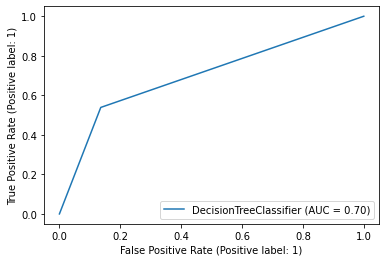

In [64]:
plot_roc_curve(model1, x_test, y_test);

## KNeighborsClassifier

W przypadku modelu KNeighbors skupimy się na parametrze n_neighbors oznaczającego ile najbliższych obserwacji ze zbioru treningowego weźmiemy pod uwagę w przypadku predykowania oraz na parametrze p definijącego czy będziemy korzystać z metryki Manhatanskiej - 1, Euklidesowskiej - 2 czy Minkowskiego - 3. 

In [88]:
model2 = KNeighborsClassifier(n_neighbors=4, p=2)

In [89]:
model2.fit(x_train, y_train)
y_hat = model2.predict(x_test)
print('y:     ' + str(y_hat[0:10].tolist()) + '\ny_hat: ' + str(y_test["RainTomorrow"].tolist()[0:10]))

y:     [0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
y_hat: [0, 1, 0, 0, 0, 0, 0, 0, 1, 0]


In [90]:
precision = cross_val_score(model2, x_test, y_test, scoring='precision', cv = 10)
np.mean(precision)

0.7333825672136172

In [91]:
accuracy = cross_val_score(model2, x_test, y_test, scoring='accuracy', cv = 10)
np.mean(accuracy)

0.8373704757787614

In [92]:
recall = cross_val_score(model2, x_test, y_test, scoring='recall', cv = 10)
np.mean(recall)

0.4125553379621388

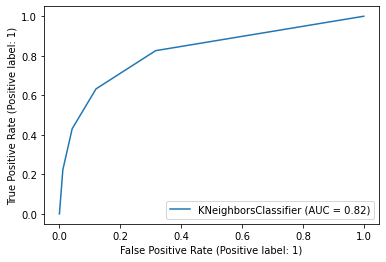

In [93]:
plot_roc_curve(model2, x_test, y_test);

## Logistic regression

W przypadku logistic regression będziemy dostosowywali parametr C określający "siłę" fitowania. W przypadku dużych wartości C, model ma tendencje do overfitowania, natomiast w przypadku małej underfitowania.

In [83]:
model3 = LogisticRegression(random_state=1, max_iter=1000, C=5)

In [84]:
model3.fit(x_train,y_train)
y_hat = model3.predict(x_test)
print('y:     ' + str(y_hat[0:10].tolist()) + '\ny_hat: ' + str(y_test["RainTomorrow"].tolist()[0:10]))

y:     [0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
y_hat: [0, 1, 0, 0, 0, 0, 0, 0, 1, 0]


In [85]:
precision = cross_val_score(model3, x_test, y_test, scoring='precision', cv = 10)
np.mean(precision)

0.7289025572479972

In [86]:
accuracy = cross_val_score(model3, x_test, y_test, scoring='accuracy', cv = 10)
np.mean(accuracy)

0.851656853810276

In [87]:
recall = cross_val_score(model3, x_test, y_test, scoring='recall', cv = 10)
np.mean(recall)

0.5219132395703519

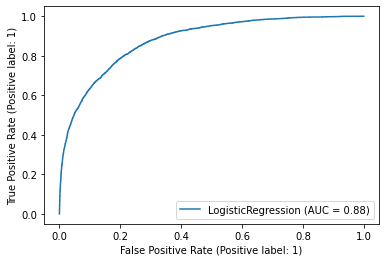

In [94]:
plot_roc_curve(model3, x_test, y_test);

Wydaje mi się, że w przypadku każdego z klasyfikatorów najbardziej odpowiednią miarą jego jakości jest miara precision, gdyż pokazuję ona , jak bardzo nasz klasyfikator jest odporny na fałszywie pozytywne wyniki. Zdecydowanie nikt z nas nie chcę zostać zaskoczony deszczem, nie będąc na to wcześniej przygotowanym, natomiast jeżeli spodziewany deszcz nie pojawi się na niebie, to nie wburzy to w nas negatywnych emocji, a z reguły wręcz przeciwnie.

Zdecydowanie najmniej przydatną miarą jest recall z wyżej wspomnianego powodu, accuracy może być przydatne natomiast w ogólnej ocenie jakości naszego klasyfikatora